## Linear regression model selection using cross validation

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
# Load
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# pd for better readability
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['Target'] = y

# Split data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Cross validation evaluation storing model and score
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores[name] = -1*np.mean(scores)  # Take the average MSE

for name, score in cv_scores.items():
    print(name, ": Mean Squared Error (Cross-Validation) = ", score)



Linear Regression : Mean Squared Error (Cross-Validation) =  3119.578887835283
Ridge Regression : Mean Squared Error (Cross-Validation) =  3113.6845156331146
Lasso Regression : Mean Squared Error (Cross-Validation) =  3115.1279854751797


Best Model:  Ridge Regression
Test Set Mean Squared Error:  2892.0145657501726
R-squared Score:  0.45414652070698225


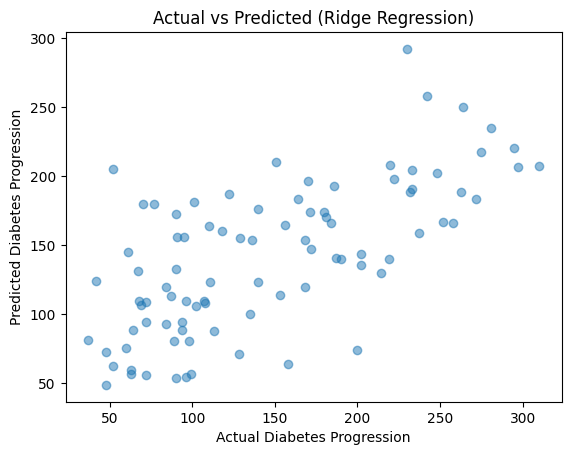

In [4]:
# Best model with lowest MSE
best_model_name = min(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]

# Train the best model and predict
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model: ", best_model_name)
print("Test Set Mean Squared Error: ", mse)
print("R-squared Score: ", r2)


plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.show()